In [724]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Conv1D, GlobalMaxPooling1D, LSTM, Dropout



In [725]:
FILE = '../data/카카오웹툰_완결작_2.xlsx'
FILE1 = '../data/카카오웹툰_연재_월요일.xlsx'
FILE2 = '../data/카카오웹툰_연재_화요일.xlsx'
FILE3 = '../data/카카오웹툰_연재_수요일.xlsx'
FILE4 = '../data/카카오웹툰_연재_목요일.xlsx'
FILE5 = '../data/카카오웹툰_연재_금요일.xlsx'
FILE6 = '../data/카카오웹툰_연재_토요일.xlsx'
FILE7 = '../data/카카오웹툰_연재_일요일.xlsx'


# 파일이름
file_names = [FILE, FILE1, FILE2, FILE3, FILE4, FILE5, FILE6, FILE7]

# 데이터 넣을 리스트
all = []

# 리스트에 파일 넣기
for file_name in file_names:
    df = pd.read_excel(file_name)
    all.append(df)

# 합치기
web_ = pd.concat(all, ignore_index=True)

web_.to_excel('output.xlsx', index=False)

# 확인하기
print(web_)

      series_id     series_title                        authors     publisher  \
0          2340              도굴왕  윤쓰(Redice Studio), 3B2S, 산지직송  redicestudio   
1          2435             오합지존                  STUDIO 강호, 이산         데일리북스   
2          2978       사사롭지만 좋은 날                             영춘    카카오웹툰 스튜디오   
3          2563    99만 전생이 날 도와줘           주식회사 마루코믹스, 백도선, 침략자    주식회사 마루코믹스   
4          3123            갑의 순정                        황한영, 이룸        피플앤스토리   
...         ...              ...                            ...           ...   
1872       3139     미친 황제가 되어버렸다                     류승현, 마루코믹스         마루코믹스   
1873       3041       요기도 괴물이 있다                             얌치    카카오웹툰 스튜디오   
1874       2962             여제화원                     PAMBA, 윤점례            연담   
1875       2629    미연시는 1회차로 족하다                       미챠, 하루한숨         대원씨아이   
1876       3404  못난이 영애의 시크릿 파우치                   예비, 가립, 퍼플레몬           테라핀   

      isAdult  viewCount  l

In [726]:
# pip install openpyxl

In [727]:
web_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   series_id     1877 non-null   int64 
 1   series_title  1877 non-null   object
 2   authors       1877 non-null   object
 3   publisher     1877 non-null   object
 4   isAdult       1877 non-null   bool  
 5   viewCount     1877 non-null   int64 
 6   likeCount     1877 non-null   int64 
 7   state         1877 non-null   object
 8   genre         1877 non-null   object
 9   synopsis      1877 non-null   object
dtypes: bool(1), int64(3), object(6)
memory usage: 133.9+ KB


In [728]:
web_.head()

,series_id,series_title,authors,publisher,isAdult,viewCount,likeCount,state,genre,synopsis
0,2340,도굴왕,"윤쓰(Redice Studio), 3B2S, 산지직송",redicestudio,False,43306584,1814822,완결,학원/판타지,"현대에 출몰한 신의 무덤.\n유물로 영웅의 능력을 쓰게 된 사람들, 부를 얻게 된 ..."
1,2435,오합지존,"STUDIO 강호, 이산",데일리북스,False,2022792,34895,완결,액션/무협,남만의 정글과 돈황의 대사막에서 십 년을 낭인으로 살아온 이산.\n이제 구월영의 기...
2,2978,사사롭지만 좋은 날,영춘,카카오웹툰 스튜디오,False,382033,25412,완결,드라마,"짝사랑에 두근거리고, \n아르바이트를 하며 과제를 하고,\n이유 없이 싫은 사람이 ..."
3,2563,99만 전생이 날 도와줘,"주식회사 마루코믹스, 백도선, 침략자",주식회사 마루코믹스,False,2985159,71024,완결,판타지 드라마,"흔하디흔한 F급 헌터 강현준,\n\n그의 존재를 비웃기라도 하듯 신은 그에게 일말의..."
4,3123,갑의 순정,"황한영, 이룸",피플앤스토리,False,289555,10608,완결,로맨스,"""처음 뵙겠습니다. 오늘부터 해외영업부 본부장을 맡게 된 강하진 입니다.""\n\n1..."


In [729]:
# 필요없는 열 삭제 
no_=['series_id', 'isAdult', 'state','publisher','authors']
web_ = web_.drop(no_, axis=1)


In [730]:
web_.head()

,series_title,viewCount,likeCount,genre,synopsis
0,도굴왕,43306584,1814822,학원/판타지,"현대에 출몰한 신의 무덤.\n유물로 영웅의 능력을 쓰게 된 사람들, 부를 얻게 된 ..."
1,오합지존,2022792,34895,액션/무협,남만의 정글과 돈황의 대사막에서 십 년을 낭인으로 살아온 이산.\n이제 구월영의 기...
2,사사롭지만 좋은 날,382033,25412,드라마,"짝사랑에 두근거리고, \n아르바이트를 하며 과제를 하고,\n이유 없이 싫은 사람이 ..."
3,99만 전생이 날 도와줘,2985159,71024,판타지 드라마,"흔하디흔한 F급 헌터 강현준,\n\n그의 존재를 비웃기라도 하듯 신은 그에게 일말의..."
4,갑의 순정,289555,10608,로맨스,"""처음 뵙겠습니다. 오늘부터 해외영업부 본부장을 맡게 된 강하진 입니다.""\n\n1..."


In [731]:
# 결측치 확인
web_.isnull().sum()

series_title    0
viewCount       0
likeCount       0
genre           0
synopsis        0
dtype: int64

In [732]:
from string import punctuation as pt
import re

In [733]:
# 구두점 제거
pt

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [734]:
web_['synopsis'] = web_['synopsis'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

c:\Users\USER\anaconda3\envs\DL_37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [735]:
# 불용어 파일 불러오기
stopword = r'../data/불용어.txt'
stopwords = pd.read_csv(stopword)
print(stopwords.columns)
stop_list = []
for i in stopwords["않다"]:
    stop_list.append(i)
stop_list

Index(['않다'], dtype='object')


['되어다',
 '되다',
 '하다',
 '어떻다',
 '이렇다',
 '이다',
 '어제',
 '매일',
 '아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '기준으로',
 '예하면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼마나',
 '얼마만큼',
 '얼마큼',
 '남짓',
 '여',
 '얼마간',
 '약간',
 '다소',
 '좀',
 '조금',
 '다수',
 '몇',
 '얼마',
 '지만',
 '하물며',
 '또한',
 '그러나',
 '그렇지만',
 '하지만',
 '뿐이다',
 '다음에',
 '만약',
 '툭',
 '딱',
 '삐

In [736]:
stopwords

,않다
0,되어다
1,되다
2,하다
3,어떻다
4,이렇다
...,...
617,뭐
618,않는
619,든
620,이라


In [737]:
web_.head(10)

,series_title,viewCount,likeCount,genre,synopsis
0,도굴왕,43306584,1814822,학원/판타지,현대에 출몰한 신의 무덤유물로 영웅의 능력을 쓰게 된 사람들 부를 얻게 된 사람들 ...
1,오합지존,2022792,34895,액션/무협,남만의 정글과 돈황의 대사막에서 십 년을 낭인으로 살아온 이산이제 구월영의 기연과 ...
2,사사롭지만 좋은 날,382033,25412,드라마,짝사랑에 두근거리고 아르바이트를 하며 과제를 하고이유 없이 싫은 사람이 있고 뭘 해...
3,99만 전생이 날 도와줘,2985159,71024,판타지 드라마,흔하디흔한 급 헌터 강현준그의 존재를 비웃기라도 하듯 신은 그에게 일말의 재능도 주...
4,갑의 순정,289555,10608,로맨스,처음 뵙겠습니다 오늘부터 해외영업부 본부장을 맡게 된 강하진 입니다년 전 첫사랑과 ...
5,모시던 아가씨가 도련님이 되어버렸다,5828234,278047,로맨스 판타지,조연에 빙의한 지 년 차 모시던 아가씨가 도련님이 되어 찾아왔다 원작 여주인공...
6,내가 딸이에요?,2745177,132655,로맨스 판타지,악마 같은 백작에게 입양되어평생 오두막에 감금된 채 살다 죽음을 맞이한 헤이린 눈...
7,죽음을 먹는 사랑,31522,2122,공포/스릴러,어느 날 거실에 아내의 시신이 담긴 캐리어를 발견하게 되는 주혁누가 봐도 범인이 자...
8,우리가 헤어진 사이에,13465418,145432,로맨스,우리는 각자가 바라는 행복을 가질 수 있을까변해버린 엄마가 낯선 딸 이라엄마는 그런...
9,악역에게 청혼받았습니다,676866,35127,로맨스 판타지,악역의 살인 현장을 목격해 버렸다 심지어 들켰다내 인생 종 치는 소리가 여기까지 들...


In [738]:
max(web_['viewCount']), min(web_['viewCount'])

(1252887166, 4481)

In [739]:
np.set_printoptions(floatmode="fixed", suppress=True)


In [740]:
web_['viewCount']

0       43306584
1        2022792
2         382033
3        2985159
4         289555
          ...   
1872       75049
1873      114430
1874      116601
1875      770648
1876      270384
Name: viewCount, Length: 1877, dtype: int64

(array([1797.00000000,   58.00000000,   11.00000000,    6.00000000,
           1.00000000,    0.00000000,    2.00000000,    0.00000000,
           0.00000000,    2.00000000]),
 array([4.48100000e+03, 1.25292750e+08, 2.50581018e+08, 3.75869286e+08,
        5.01157555e+08, 6.26445824e+08, 7.51734092e+08, 8.77022360e+08,
        1.00231063e+09, 1.12759890e+09, 1.25288717e+09]),
 <BarContainer object of 10 artists>)

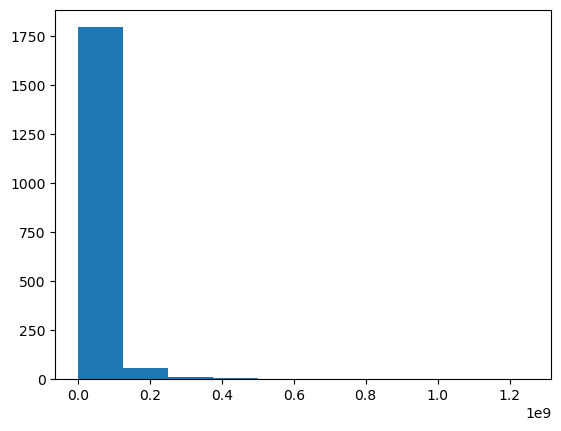

In [741]:
import matplotlib.pyplot  as plt

plt.hist(web_['viewCount'])

In [742]:
# 값이 4000에서 13억 까지 분포가커서 로그화 
web_.viewCount = np.log(web_.viewCount)


<AxesSubplot:>

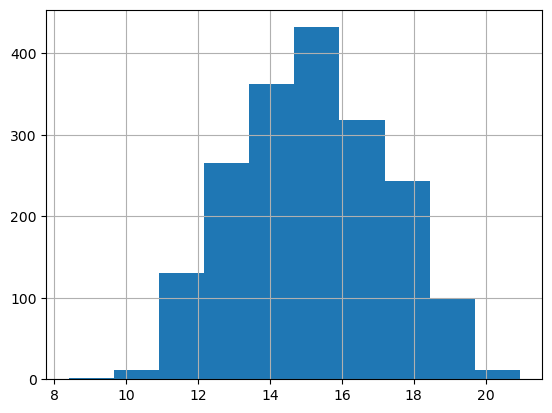

In [743]:
web_.viewCount.hist(bins = 10)

In [744]:
# viewCount를 라벨링
web_['viewCount'] = pd.cut(web_['viewCount'], 
                           bins=[8, 10, 12, 14, 16, 18, 20, 25], 
                           labels=[0, 1, 2, 3, 4, 5, 6])
                                    
print(web_['viewCount'])

0       4
1       3
2       2
3       3
4       2
       ..
1872    1
1873    1
1874    1
1875    2
1876    2
Name: viewCount, Length: 1877, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]


In [745]:
web_.head()

,series_title,viewCount,likeCount,genre,synopsis
0,도굴왕,4,1814822,학원/판타지,현대에 출몰한 신의 무덤유물로 영웅의 능력을 쓰게 된 사람들 부를 얻게 된 사람들 ...
1,오합지존,3,34895,액션/무협,남만의 정글과 돈황의 대사막에서 십 년을 낭인으로 살아온 이산이제 구월영의 기연과 ...
2,사사롭지만 좋은 날,2,25412,드라마,짝사랑에 두근거리고 아르바이트를 하며 과제를 하고이유 없이 싫은 사람이 있고 뭘 해...
3,99만 전생이 날 도와줘,3,71024,판타지 드라마,흔하디흔한 급 헌터 강현준그의 존재를 비웃기라도 하듯 신은 그에게 일말의 재능도 주...
4,갑의 순정,2,10608,로맨스,처음 뵙겠습니다 오늘부터 해외영업부 본부장을 맡게 된 강하진 입니다년 전 첫사랑과 ...


In [746]:
stopwords2=stopwords['않다'].to_list()
print(f'불용어 개수 :, {len(stopwords2)}', stopwords2, sep = '\n')

불용어 개수 :, 622
['되어다', '되다', '하다', '어떻다', '이렇다', '이다', '어제', '매일', '아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '기준으로', '예하면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '뿐이다', '다음에', '만약', '툭', '딱', '삐걱거리다', '보드득', '비걱거리다', '꽈당', '응당', '해야한다', '에 가서', '각', '각각', '여러분', '각종', '각자', '제각기', '하도록하다', '와', '과', '그러므로', '

### 불용어 처리

In [747]:

okt = Okt()

word_list=[]
for sentence in web_['synopsis']:
    word_list.append(okt.morphs(sentence))

    

In [748]:
word_list

[['현대',
  '에',
  '출몰',
  '한',
  '신의',
  '무덤',
  '유물',
  '로',
  '영웅',
  '의',
  '능력',
  '을',
  '쓰게',
  '된',
  '사람',
  '들',
  '부를',
  '얻게',
  '된',
  '사람',
  '들',
  '그리고',
  '그',
  '유물',
  '을',
  '털어가는',
  '의문',
  '의',
  '도굴',
  '꾼',
  '이',
  '나타났다',
  '도굴',
  '왕',
  '아이',
  '씨',
  '미치겠네',
  '여기',
  '도',
  '또',
  '그',
  '자식',
  '이',
  '다',
  '털어',
  '갔냐',
  '네',
  '것',
  '도',
  '내',
  '것',
  '내',
  '건',
  '당연히',
  '내',
  '것',
  '다시',
  '살아난',
  '도굴',
  '꾼',
  '그',
  '가',
  '세상',
  '모든',
  '무덤',
  '을',
  '접수',
  '하기',
  '시작',
  '한',
  '다'],
 ['남만',
  '의',
  '정글',
  '과',
  '돈황',
  '의',
  '대',
  '사막',
  '에서',
  '십',
  '년',
  '을',
  '낭인',
  '으로',
  '살아온',
  '이산',
  '이제',
  '구',
  '월영',
  '의',
  '기연',
  '과',
  '도',
  '한',
  '자루',
  '를',
  '품고',
  '강호',
  '의',
  '복수',
  '에',
  '발',
  '을',
  '디뎠다',
  '피',
  '에',
  '젖은',
  '강호',
  '를',
  '독보',
  '강호',
  '하',
  '며',
  '무신',
  '으로',
  '일어선',
  '풍운아',
  '낭인',
  '도',
  '객',
  '흑',
  '전랑',
  '이산',
  '의',
  '강호',
  '일대기'],
 ['짝사랑',
  '에',
  '두근거리고',
  '

In [749]:
train_word = []
for i in word_list:
    all_w = ""
    for w in i:
        if w not in stop_list:
            all_w = all_w+w+" "
    train_word.append(all_w)

In [750]:
train_word

['현대 출몰 신의 무덤 유물 영웅 능력 쓰게 사람 부를 얻게 사람 유물 털어가는 의문 도굴 꾼 나타났다 도굴 왕 씨 미치겠네 자식 털어 갔냐 당연히 다시 살아난 도굴 꾼 세상 모든 무덤 접수 하기 시작 ',
 '남만 정글 돈황 대 사막 십 낭인 살아온 이산 이제 월영 기연 자루 품고 강호 복수 발 디뎠다 피 젖은 강호 독보 강호 며 무신 일어선 풍운아 낭인 객 흑 전랑 이산 강호 일대기 ',
 '짝사랑 두근거리고 아르바이트 하며 과제 하고 이유 없이 싫은 사람 있고 뭘 해야 할지 몰라 방황 하는 친구 에피소드 마다 씩 소개 되는 주인공 사연 닮은 모습 하고 평범하지만 특별한 하루하루 별것 아닌 같지만 여운 깊은 이야기 펼쳐진다 ',
 '흔 하디 흔한 급 헌터 강현준 존재 비 웃기 라도 하듯 신은 일말 재능 주지 않았 다그 언제나 기도 했 다모 바꿀 힘 달라 고아 니 재능 내놔 신 자식 부름에 누군가 응답 했다 카르타고 정의 로운 방패 수호 합니다 아닙니다 최후 검 성 시든 밀러 용맹함에 감탄 하며 주시 합니다 배후 그림자 하사 신 사악한 계략 감탄 하여 찬사 보냅니다 지키지 단치히 의지 그만 도대체 이나 있는 만만 전생 깨달 은급 흙 수저 헌터 강현준 전생 수저 물 지금 출발 합니다 ',
 '처음 뵙겠습니다 오늘 해외 영업 부 본부장 맡게 강하진 입니 다년 첫사랑 하룻밤 실수 후 다시 볼 없을 라 생각 했던 남자 갑 되어 나타났다 넌 나와 죽어도 연애 하겠고 그냥 부하 직원 대 할 없고 그렇다면 답 밖에 없지 그게 대체 뭔 데 파트너 지내는 밖에 부드럽게 휘 지는 하진 눈 꼬리 보며 지혜 직감 했 다년 만에 또다시 인생 강하진 이라는 커다란 시련 끼어들었 음 ',
 '조연 빙의 차 모시던 아가씨 도련님 되어 찾아왔다 원작 주인공 시 녀 생활 청산 지도 웬 잘생긴 남자 찾아왔다 그것 모시던 아가씨 닮은 남자 약속 지키러 왔어 블레 나와 평생 하겠다고 했잖아 설마 아가씨 순간 남자 붉은 눈 이채 돌았다 코앞 다가온 고개 기울여 머리카락 입 맞췄다 속삭였다 아주 

In [751]:
train_word = pd.DataFrame(train_word)

In [752]:
web_.synopsis = train_word

In [753]:
web_.head()

,series_title,viewCount,likeCount,genre,synopsis
0,도굴왕,4,1814822,학원/판타지,현대 출몰 신의 무덤 유물 영웅 능력 쓰게 사람 부를 얻게 사람 유물 털어가는 의문...
1,오합지존,3,34895,액션/무협,남만 정글 돈황 대 사막 십 낭인 살아온 이산 이제 월영 기연 자루 품고 강호 복수...
2,사사롭지만 좋은 날,2,25412,드라마,짝사랑 두근거리고 아르바이트 하며 과제 하고 이유 없이 싫은 사람 있고 뭘 해야 할...
3,99만 전생이 날 도와줘,3,71024,판타지 드라마,흔 하디 흔한 급 헌터 강현준 존재 비 웃기 라도 하듯 신은 일말 재능 주지 않았 ...
4,갑의 순정,2,10608,로맨스,처음 뵙겠습니다 오늘 해외 영업 부 본부장 맡게 강하진 입니 다년 첫사랑 하룻밤 실...


In [754]:
web_['viewCount'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       4
1       3
2       2
3       3
4       2
       ..
1872    1
1873    1
1874    1
1875    2
1876    2
Name: viewCount, Length: 1877, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]>

In [755]:
# from nltk import FreqDist

In [756]:
# vocab = FreqDist(np.hstack(tokenized))
# print('단어 집합의 크기 : {}'.format(len(vocab)))

In [757]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [758]:
OOV='<oov>'

In [759]:
tk = Tokenizer(oov_token=OOV)
tk.fit_on_texts(web_.synopsis)

In [760]:
#  테스트 데이터에 존재하는 단어 수 
VOCA_SIZE=len(tk.word_index)
print(f'사전 단어 수: {VOCA_SIZE}')

사전 단어 수: 19630


In [761]:
# 단어의 빈도 / 이걸 그대로 (sorted) 정렬하면 알파벳 순으로
# reverse로 많이 나온 애들 보고 
sorted(tk.word_counts.items(), key =(lambda x : x[1]), reverse =True)

[('인', 561),
 ('하는', 551),
 ('시작', 438),
 ('사람', 437),
 ('위해', 422),
 ('그녀', 403),
 ('하고', 384),
 ('된다', 353),
 ('할', 347),
 ('남자', 331),
 ('사랑', 323),
 ('한다', 289),
 ('속', 287),
 ('있는', 284),
 ('이야기', 259),
 ('없는', 256),
 ('했다', 228),
 ('말', 226),
 ('눈', 221),
 ('주인공', 216),
 ('세상', 212),
 ('하게', 211),
 ('세계', 208),
 ('결혼', 207),
 ('있을까', 206),
 ('모든', 202),
 ('삶', 199),
 ('같은', 196),
 ('다시', 191),
 ('곳', 178),
 ('소설', 177),
 ('작가', 175),
 ('되어', 171),
 ('죽음', 168),
 ('인간', 166),
 ('생각', 162),
 ('빙의', 156),
 ('위', 155),
 ('황제', 152),
 ('집', 149),
 ('후', 148),
 ('하지', 147),
 ('몸', 144),
 ('마음', 144),
 ('인생', 142),
 ('가족', 139),
 ('되는데', 136),
 ('대', 135),
 ('하며', 135),
 ('딸', 133),
 ('여자', 133),
 ('앞', 132),
 ('하는데', 132),
 ('과거', 132),
 ('라', 129),
 ('줄', 129),
 ('친구', 126),
 ('되고', 124),
 ('처럼', 124),
 ('힘', 122),
 ('게임', 121),
 ('남', 120),
 ('운명', 119),
 ('될', 119),
 ('복수', 117),
 ('기억', 117),
 ('신', 116),
 ('하기', 115),
 ('되는', 115),
 ('손', 115),
 ('뿐', 113),
 ('순간', 111),
 ('에는', 1

In [762]:
wordFreq=pd.DataFrame(tk.word_counts.items())
wordFreq[1].value_counts()

1      10472
2       3183
3       1608
4        891
5        610
       ...  
101        1
116        1
122        1
80         1
152        1
Name: 1, Length: 166, dtype: int64

In [763]:
# 3번이상 나온 단어를 선택해서 분석 단어가 19000개 이상이어서 5974개로 쓰기로 선택
# WORD_NUMS = wordFreq[wordFreq[1]>=3].shape[0]
WORD_NUMS =VOCA_SIZE
print(f'분석에 사용할 단어 수 : {WORD_NUMS}')

분석에 사용할 단어 수 : 19630


In [764]:
wordFreq[1].min(), wordFreq[1].max()

(1, 561)

In [765]:
tk = Tokenizer(num_words=WORD_NUMS, oov_token=OOV)
tk.fit_on_texts(web_.synopsis)

In [766]:
len(tk.word_index), tk.word_counts

(19630,
 OrderedDict([('현대', 13),
              ('출몰', 5),
              ('신의', 63),
              ('무덤', 3),
              ('유물', 8),
              ('영웅', 65),
              ('능력', 98),
              ('쓰게', 4),
              ('사람', 437),
              ('부를', 10),
              ('얻게', 20),
              ('털어가는', 1),
              ('의문', 31),
              ('도굴', 4),
              ('꾼', 13),
              ('나타났다', 17),
              ('왕', 70),
              ('씨', 22),
              ('미치겠네', 1),
              ('자식', 17),
              ('털어', 3),
              ('갔냐', 1),
              ('당연히', 9),
              ('다시', 191),
              ('살아난', 4),
              ('세상', 212),
              ('모든', 202),
              ('접수', 5),
              ('하기', 115),
              ('시작', 438),
              ('남만', 1),
              ('정글', 7),
              ('돈황', 1),
              ('대', 135),
              ('사막', 3),
              ('십', 16),
              ('낭인', 5),
              ('살아온', 16),
          

In [767]:
#  텍스트 ==> 숫자로 변환
seqText=tk.texts_to_sequences(web_.synopsis)
seqTextLen=pd.Series([ len(text) for text in seqText ])
seqTextLen.median(), seqTextLen.min(), seqTextLen.max(), seqTextLen.mean()

(48.0, 3, 297, 48.8236547682472)

In [768]:
len(seqTextLen[seqTextLen>50]), len(seqTextLen[seqTextLen>100]), len(seqTextLen[seqTextLen>150])

(909, 156, 11)

<AxesSubplot:ylabel='Frequency'>

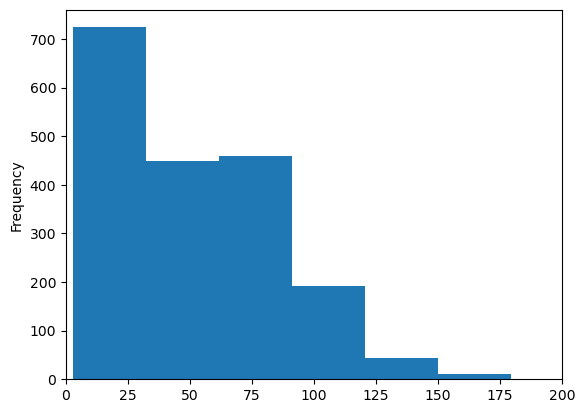

In [769]:
# 문장별 단어 수 길이 분포 ----------------------------
seqTextLen.plot(kind='hist', xlim=[0, 200])

In [770]:
# 그래프 찍어서 값확인
TEXT_LENGTH=120
TEXT_LENGTH

120

In [771]:
textData=pad_sequences(seqText, maxlen=TEXT_LENGTH)

type(textData), textData.shape,  web_.viewCount.shape

(numpy.ndarray, (1877, 120), (1877,))

In [772]:
textLabel=web_.viewCount

In [773]:
from sklearn.model_selection import train_test_split

In [774]:
textLabel

0       4
1       3
2       2
3       3
4       2
       ..
1872    1
1873    1
1874    1
1875    2
1876    2
Name: viewCount, Length: 1877, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

## ====== 모델 =======

In [775]:
X_train, X_test, y_train, y_test = train_test_split(textData,
                                                    textLabel, 
                                                    test_size=0.1,
                                                    random_state=42)
                                                    

In [776]:
X_train.shape, y_train.shape,  X_test.shape, y_test.shape

((1689, 120), (1689,), (188, 120), (188,))

In [777]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                    y_train, 
                                                  test_size=0.1,
                                                    random_state=42)

In [778]:
X_train

array([[   0,    0,    0, ...,  138,    4,    9],
       [   0,    0,    0, ..., 6751,   24, 3909],
       [   0,    0,    0, ...,   46, 1580, 1200],
       ...,
       [   0,    0,    0, ...,  202,   65,   26],
       [   0,    0,    0, ...,  530, 8031, 1803],
       [   0,    0,    0, ...,  483,   29,  414]])

In [779]:

X_train.shape, y_train.shape,  X_val.shape, y_val.shape, X_train[0].shape

((1520, 120), (1520,), (169, 120), (169,), (120,))

In [780]:
# 데이터 쪼개기 
# train_data, test_data = train_test_split(web_, test_size=0.2, random_state=42)

In [781]:
model = Sequential()
model.add(Embedding(input_dim=WORD_NUMS, output_dim=32, input_length=TEXT_LENGTH))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))



# model = Sequential()
# model.add(Embedding(WORD_NUMS, 32))
# model.add(MaxPooling1D(padding='same', activation='relu'))
# model.add(Dense(1, activation='linear'))
# category로 바꾸고 Dense추가 2개 더 추가  단어 2번이상

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [782]:
# 가장 좋은 loss의 가중치 저장
import tensorflow as tf
checkpoint_path = 'best_performed_model.ckpt'
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_weights_only=True,
                                                save_best_only=True,
                                                monitor='val_accuracy',
                                                verbose=1)

In [783]:
# 학습조기 종료
# earlystopping
# earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.1 ,patience=5)

In [784]:
# Fit the model on the training data
history = model.fit(X_train, y_train, 
                    epochs=15, 
                    batch_size=32, 
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint])

Epoch 1/15
47/48 [============================>.] - ETA: 0s - loss: 1.7264 - accuracy: 0.2779
Epoch 1: val_accuracy improved from -inf to 0.33728, saving model to best_performed_model.ckpt
48/48 [==============================] - 5s 60ms/step - loss: 1.7260 - accuracy: 0.2763 - val_loss: 1.4976 - val_accuracy: 0.3373
Epoch 2/15
48/48 [==============================] - ETA: 0s - loss: 1.5563 - accuracy: 0.3079
Epoch 2: val_accuracy improved from 0.33728 to 0.52663, saving model to best_performed_model.ckpt
48/48 [==============================] - 3s 59ms/step - loss: 1.5563 - accuracy: 0.3079 - val_loss: 1.4199 - val_accuracy: 0.5266
Epoch 3/15
48/48 [==============================] - ETA: 0s - loss: 1.4183 - accuracy: 0.3967
Epoch 3: val_accuracy did not improve from 0.52663
48/48 [==============================] - 3s 59ms/step - loss: 1.4183 - accuracy: 0.3967 - val_loss: 1.3092 - val_accuracy: 0.5089
Epoch 4/15
48/48 [==============================] - ETA: 0s - loss: 1.2852 - accurac

In [785]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

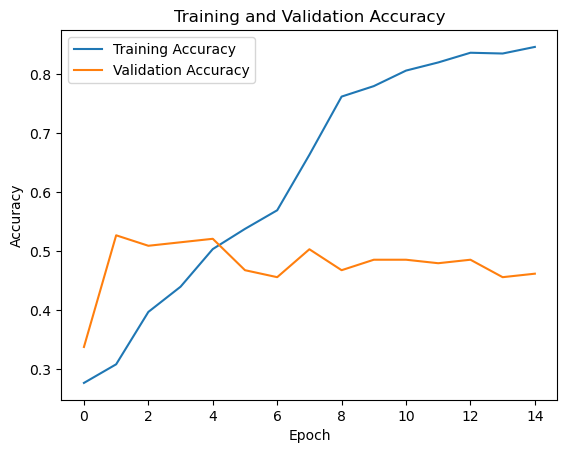

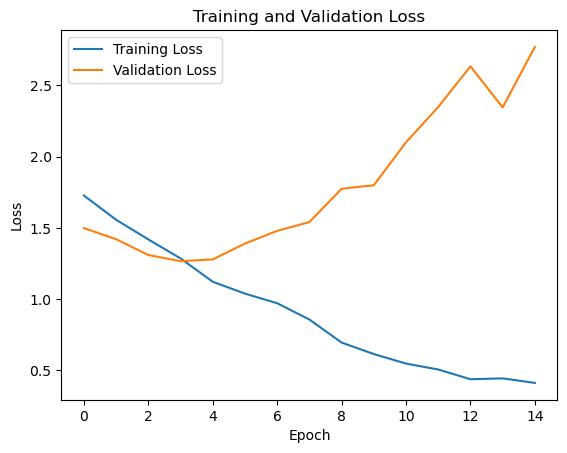

In [786]:
import matplotlib.pyplot as plt
# 정확도 그래프
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 손실률 그래프
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [787]:
# # 토큰화
# NUM_WORD = 50000
# tokenizer = Tokenizer(num_words=NUM_WORD, oov_token='<OOV>')
# tokenizer.fit_on_texts(df['synopsis'])
# sequences = tokenizer.texts_to_sequences(df['synopsis'])
# padded_sequences = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')


In [788]:
y_pred = model.predict(X_test)
print(y_pred[100])
# Print the predicted labels for the first 10 samples
print(np.argmax(y_pred[100]))

6/6 [==============================] - 0s 9ms/step
[0.00013346 0.08583444 0.00467970 0.90769905 0.00109743 0.00039391
 0.00016225]
3


In [789]:
# score=model.evaluate(X_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [790]:
model.save('model2.h5')